## 10.1 프로젝트 준비
- Prettier 설정
    - 프로젝트 최상위 디렉터리에 .prettierrc 생성
- index.css 수정
- App 컴포넌트 초기화

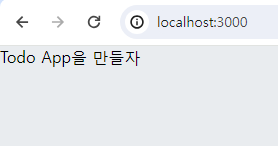

## 10.2 UI 구성
1. TodoTemplate
    - 화면을 가운데에 정렬시켜주며, 앱 타이틀을 보여준다
    - children으로 내부 JSX를 props로 받아와서 렌더링
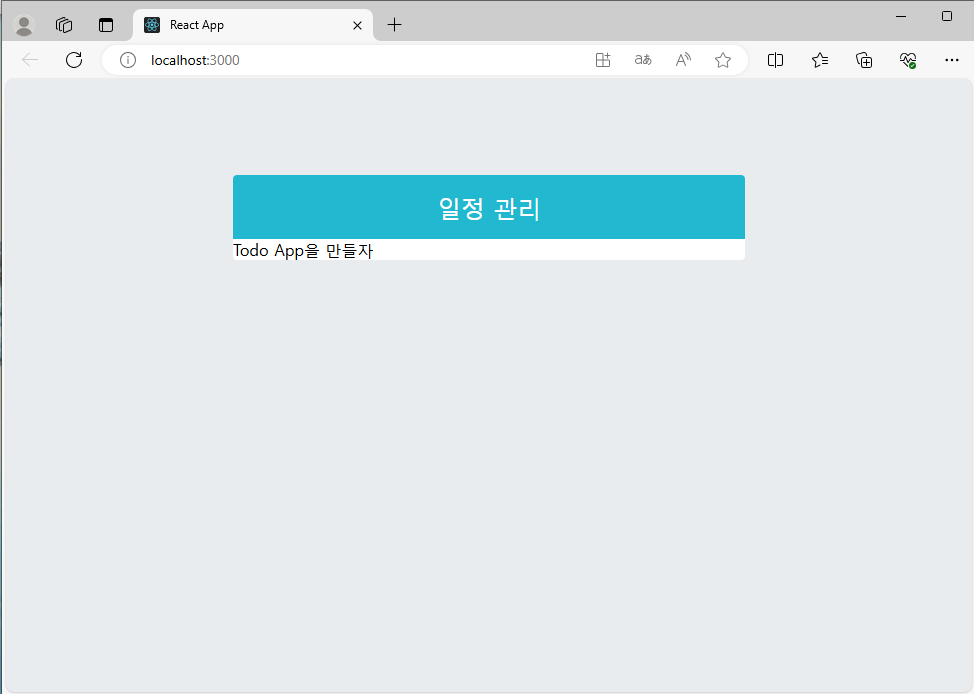

2. TodoInsert
    - 새로운 항목을 입력하고 추가할 수 있는 컴포넌트
    - state를 통해 인풋의 상태 관리
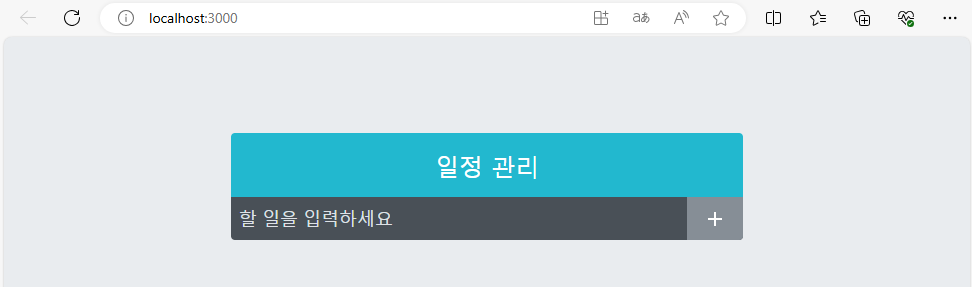

3. TodoListItem
    - 각 할 일 항목에 대한 정보를 보여준다.
    - todo 객체를 props로 받아 상태에 따라 다른 스타일의 UI를 보여준다


4. TodoList
    - todos 배열을 props로 받아 이를 map을 사용해 여러 개의 todolistitem 컴포넌트로 변환해 보여준다
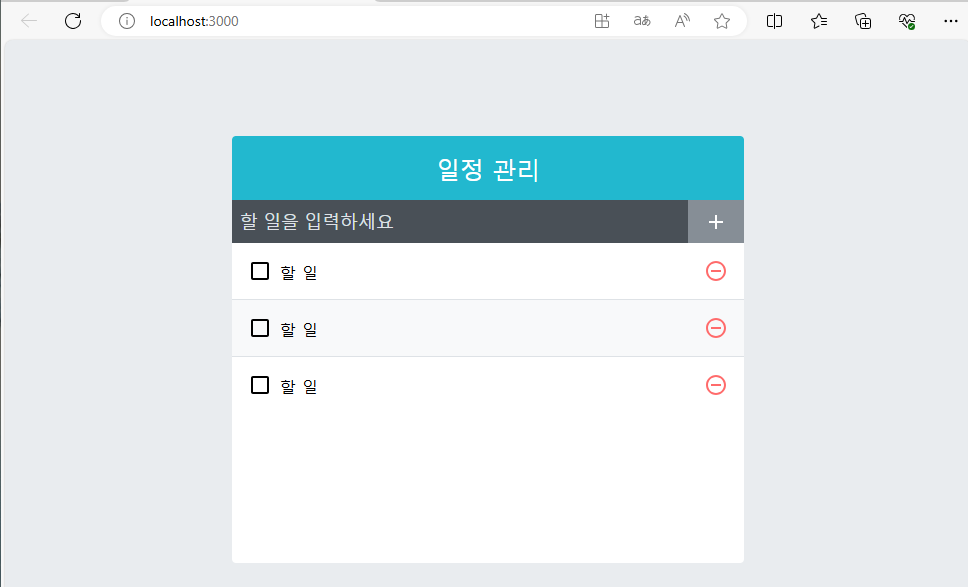

## 10.3 기능 구현
### App 에서 todos 상태 사용하기
- App에서 useState를 사용해 todos 상태 정의, todos를 props로 전달
```js
import { useState } from 'react'
import TodoTemplate from "./components/TodoTemplate";
import TodoInsert from "./components/TodoInsert";
import TodoList from "./components/TodoList";

const App = () => {
  const [todos, setTodos ] = useState([
    {
      id:1,
      text:'리액트 기초 알아보기',
      checked: true,
    },
    {
      id:2,
      text:'컴포넌트 스타일링해 보기',
      checked: true,
    },
    {
      id:3,
      text:'일정 관리 앱 만들어 보기',
      checked: flase,
    },
  ]);

  return (
    <TodoTemplate>
      <TodoInsert />
      <TodoList todos={todos} />
    </TodoTemplate>
  )
};

export default App;
```
- todolist에서 props로 값을 받아 온 후 todoitem으로 변환하여 렌더링 하도록 설정
```js
import TodoListItem from './TodoListItem';
import './TodoList.scss';

const TodoList = ({ todos }) => {
    return (
        <div className='TodoList'>
            {todos.map(todo => (
                <TodoListItem todo={todo} key={todo.id} />
            ))}            
        </div>
    );
};

export default TodoList;
```
- props로 받아 온 todos 배열을 map을 통해 todolistitem으로 이루어진 배열로 변환해 렌더링
- todolistitem 컴포넌트에서 받아 온 todo 값에 따라 UI를 보여 줄 수 있도록 수정
```js
import {
    MdCheckBoxOutlineBlank,
    MdCheckBox,
    MdRemoveCircleOutline,
} from 'react-icons/md';

import cn from 'classnames';
import './TodoListItem.scss';

const TodoListItem = ({todo}) => {
    const { text, checked } = todo
    return (
        <div className='TodoListItem'>
            <div className={cn('checkbox',{checked})}>
                {checked ? <MdCheckBox/> : <MdCheckBoxOutlineBlank/>}
                <div className='text'>{text}</div>
            </div>
            <div className='remove'>
                <MdRemoveCircleOutline />
            </div>
        </div>
    );
};

export default TodoListItem;
```
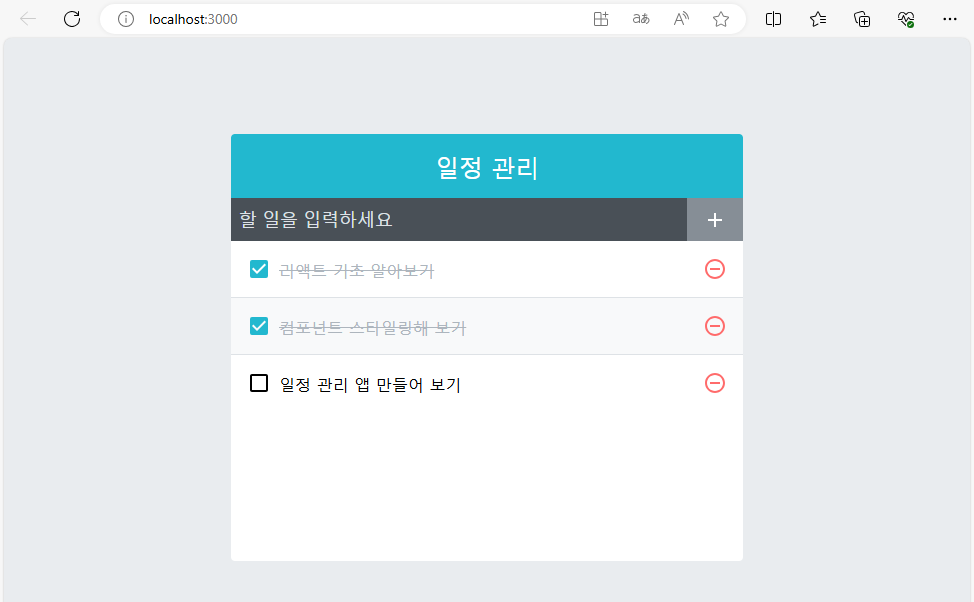

### 항목 추가 기능 구현하기
- TodoInsert 컴포넌트에서 인풋 상태를 관리하고 App 컴포넌트에는 todos 배열에 새로운 객체를 추가하는 함수를 만들어야 한다.
```js
import { useState, useCallback } from 'react';
import { MdAdd } from 'react-icons/md';
import './TodoInsert.scss';

const TodoInsert = () => {
    const [value, setValue] = useState('');

    const onChange = useCallback(e => {
        setValue(e.target.value);
    }, []);

    return (
        <form className="TodoInsert">
            <input
                placeholder="할 일을 입력하세요"
                value={value}
                onChange={onChange}
            />
            <button type="submit">
                <MdAdd />
            </button>
        </form>
    );
};

export default TodoInsert;
```
- App 컴포넌트에서 todos 배열에 새 객체를 추가하는 onInsert 함수 생성
```js
import { useState, useRef, useCallback } from 'react'
import TodoTemplate from "./components/TodoTemplate";
import TodoInsert from "./components/TodoInsert";
import TodoList from "./components/TodoList";

const App = () => {
  const [todos, setTodos ] = useState([
    {
      id:1,
      text:'리액트 기초 알아보기',
      checked: true,
    },
    {
      id:2,
      text:'컴포넌트 스타일링해 보기',
      checked: true,
    },
    {
      id:3,
      text:'일정 관리 앱 만들어 보기',
      checked: false,
    },
  ]);

  // 고유값 id, ref를 사용해 변수 담기
  const nextId = useRef(4);

  const onInsert = useCallback(
    text => {
      const todo = {
        id : nextId.current,
        text,
        checked:false,
      }
      setTodos(todos.concat(todo))
      nextId.current += 1
    },
    [todos],
  )

  return (
    <TodoTemplate>
      <TodoInsert onInsert={onInsert}/>
      <TodoList todos={todos} />
    </TodoTemplate>
  )
};

export default App;
```
- 버튼을 클릭하면 이벤트 발생
- App에서 todoinsert에 넣어 준 oninsert 함수에 현재 usestae를 통해 관리하고 있는 value 값을 파라미터로 넣어서 호출
```js
import { useState, useCallback } from 'react';
import { MdAdd } from 'react-icons/md';
import './TodoInsert.scss';

const TodoInsert = ({onInsert}) => {
    const [value, setValue] = useState('');

    const onChange = useCallback(e => {
        setValue(e.target.value);
    }, []);

    const onSubmit = useCallback(
        e => {
            onInsert(value)
            setValue('')
            e.preventDefault()
        },
        [onInsert, value],
    )

    return (
        <form className="TodoInsert" onSubmit={onSubmit}>
            <input
                placeholder="할 일을 입력하세요"
                value={value}
                onChange={onChange}
            />
            <button type="submit">
                <MdAdd />
            </button>
        </form>
    );
};

export default TodoInsert;
```
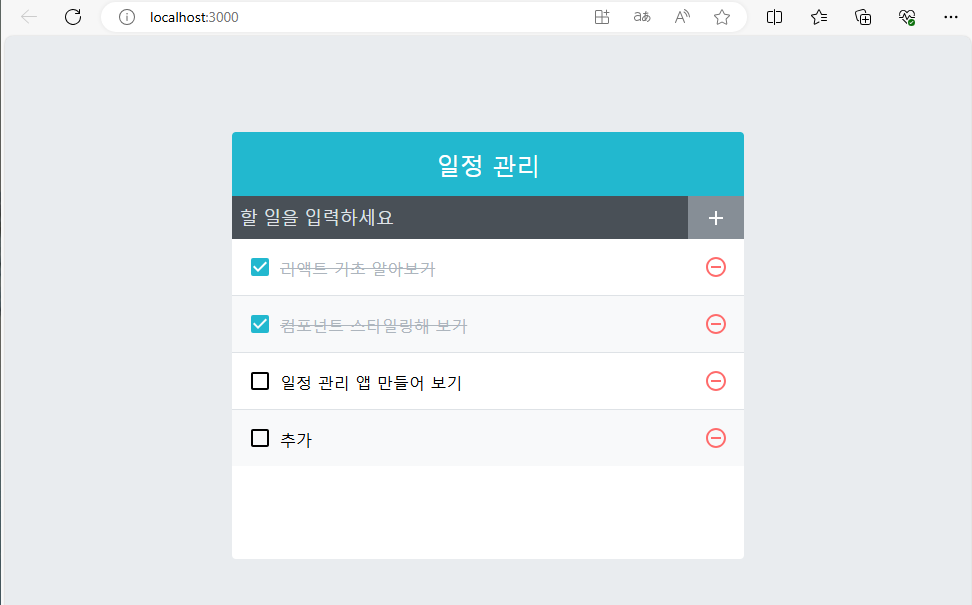

### 지우기 기능 구현
- 배열의 불변성을 지키면서 배열 원소를 제거해야 할 경우 filter를 사용
- todos 배열에서 id로 항목 지우기

```js
import { useState, useRef, useCallback } from 'react'
import TodoTemplate from "./components/TodoTemplate";
import TodoInsert from "./components/TodoInsert";
import TodoList from "./components/TodoList";

const App = () => {
  const [todos, setTodos ] = useState([
    {
      id:1,
      text:'리액트 기초 알아보기',
      checked: true,
    },
    {
      id:2,
      text:'컴포넌트 스타일링해 보기',
      checked: true,
    },
    {
      id:3,
      text:'일정 관리 앱 만들어 보기',
      checked: false,
    },
  ]);

  // 고유값 id, ref를 사용해 변수 담기
  const nextId = useRef(4);

  const onInsert = useCallback(
    text => {
      const todo = {
        id : nextId.current,
        text,
        checked:false,
      }
      setTodos(todos.concat(todo))
      nextId.current += 1
    },
    [todos],
  )

  const onRemove = useCallback(
    id => {
      setTodos(todos.filter(todo => todo.id !== id))
    },
    [todos],
  )

  return (
    <TodoTemplate>
      <TodoInsert onInsert={onInsert}/>
      <TodoList todos={todos} onRemove={onRemove}/>
    </TodoTemplate>
  )
};

export default App;
```
- TodoListItem에서 삭제 함수 호출
- todolistitem에서 onRemove 함수를 사용하려면 todolist 컴포넌트를 거쳐야 한다.
```js
import TodoListItem from './TodoListItem';
import './TodoList.scss';

const TodoList = ({ todos, onRemove }) => {
    return (
        <div className='TodoList'>
            {todos.map(todo => (
                <TodoListItem todo={todo} key={todo.id} onRemove={onRemove}/>
            ))}            
        </div>
    );
};

export default TodoList;
```
- 삭제 버튼을 누르면 todolistitem에서 onremove 함수에 현재 자신이 가진 id를 넣어서 삭제 함수를 호출하도록 설정
```js
import {
    MdCheckBoxOutlineBlank,
    MdCheckBox,
    MdRemoveCircleOutline,
} from 'react-icons/md';

import cn from 'classnames';
import './TodoListItem.scss';

const TodoListItem = ({todo, onRemove}) => {
    const { id, text, checked } = todo
    return (
        <div className='TodoListItem'>
            <div className={cn('checkbox',{checked})}>
                {checked ? <MdCheckBox/> : <MdCheckBoxOutlineBlank/>}
                <div className='text'>{text}</div>
            </div>
                <div className="remove" onClick={() => onRemove(id)}>
                <MdRemoveCircleOutline />
            </div>
        </div>
    );
};

export default TodoListItem;
```

### 상태 수정 기능
- onToggle 함수를 app에 만들고, 해당 함수를 todolist 컴포넌트에 props로 넣어준다.
- todolist를 통해 todolistitem까지 전달
- onToggle 구현
```js
import { useState, useRef, useCallback } from 'react'
import TodoTemplate from "./components/TodoTemplate";
import TodoInsert from "./components/TodoInsert";
import TodoList from "./components/TodoList";

const App = () => {
  const [todos, setTodos ] = useState([
    {
      id:1,
      text:'리액트 기초 알아보기',
      checked: true,
    },
    {
      id:2,
      text:'컴포넌트 스타일링해 보기',
      checked: true,
    },
    {
      id:3,
      text:'일정 관리 앱 만들어 보기',
      checked: false,
    },
  ]);

  // 고유값 id, ref를 사용해 변수 담기
  const nextId = useRef(4);

  const onInsert = useCallback(
    text => {
      const todo = {
        id : nextId.current,
        text,
        checked:false,
      }
      setTodos(todos.concat(todo))
      nextId.current += 1
    },
    [todos],
  )

  const onRemove = useCallback(
    id => {
      setTodos(todos.filter(todo => todo.id !== id))
    },
    [todos],
  )

  const onToggle = useCallback(
    id => {
      setTodos(
        todos.map(todo =>
          todo.id === id ? { ...todo, checked: !todo.checked } : todo,
        ),
      )
    },
    [todos],
  )

  return (
    <TodoTemplate>
      <TodoInsert onInsert={onInsert}/>
      <TodoList todos={todos} onRemove={onRemove} onToggle={onToggle}/>
    </TodoTemplate>
  )
};

export default App;
```
- todolistitem에서 토글 함수 호출
```js
import TodoListItem from './TodoListItem';
import './TodoList.scss';

const TodoList = ({ todos, onRemove, onToggle }) => {
    return (
        <div className='TodoList'>
            {todos.map(todo => (
                <TodoListItem todo={todo} key={todo.id} onRemove={onRemove} onToggle={onToggle}/>
            ))}            
        </div>
    );
};

export default TodoList;
```
```js
import {
    MdCheckBoxOutlineBlank,
    MdCheckBox,
    MdRemoveCircleOutline,
} from 'react-icons/md';

import cn from 'classnames';
import './TodoListItem.scss';

const TodoListItem = ({todo, onRemove, onToggle}) => {
    const { id, text, checked } = todo
    return (
        <div className='TodoListItem'>
            <div className={cn('checkbox',{checked})} onClick={() => onToggle(id)}>
                {checked ? <MdCheckBox/> : <MdCheckBoxOutlineBlank/>}
                <div className='text'>{text}</div>
            </div>
                <div className="remove" onClick={() => onRemove(id)}>
                <MdRemoveCircleOutline />
            </div>
        </div>
    );
};

export default TodoListItem;
```
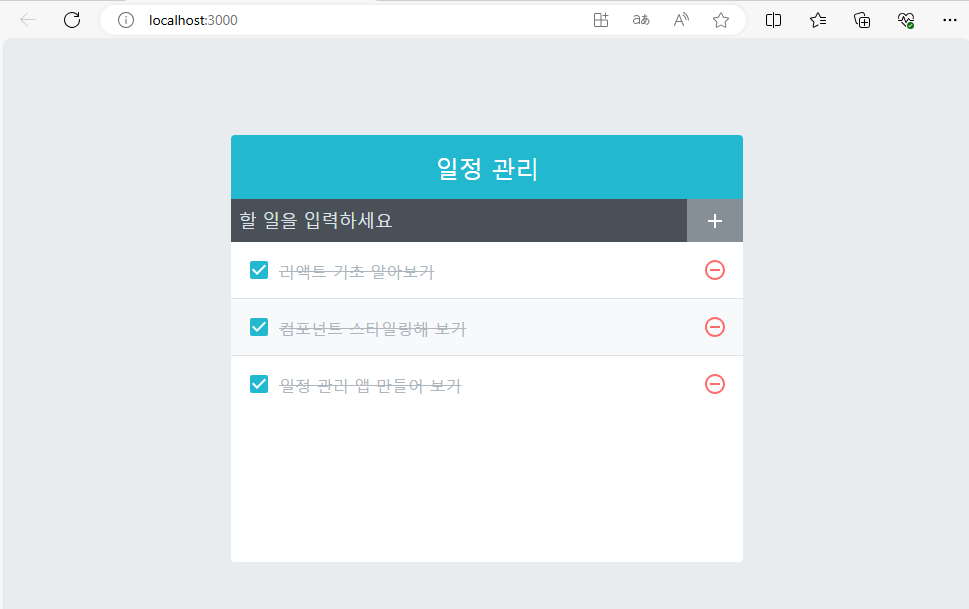
- 체크 박스 상태가 잘 업데이트 됨

## 10.4 정리
- 따로 컴포넌트 리렌더링 최적화 작업을 안해도 정상적으로 작동한다.
- 일정 항목이 몇 만 개 씩 생긴다면 새로운 항목을 추가하거나 기존 항목을 삭제 및 토글할 때 지연이 발생 할 수 있다.
- 불필요한 리렌더링을 방지해야한다.